In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("/content/DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [10]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [11]:
df.isnull().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


Q2:

Time Series Visualization:

Plot the time series for all variables (e.g., daily mean temperature and precipitation).

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

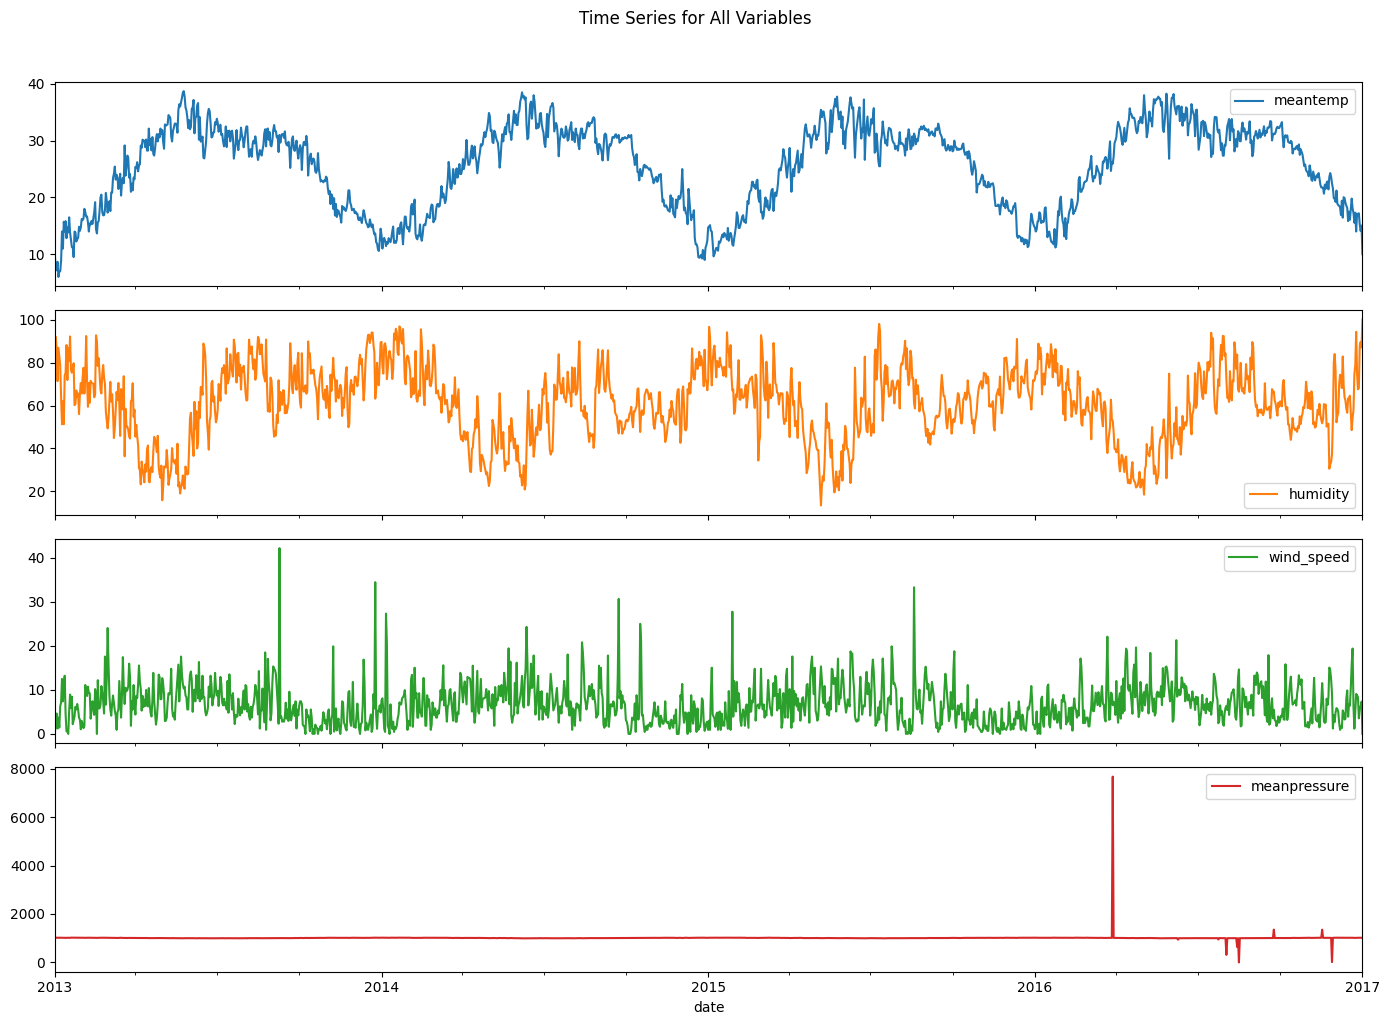

In [13]:

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Plot time series for all variables
df.plot(figsize=(14, 10), subplots=True, layout=(len(df.columns), 1), sharex=True)
plt.suptitle('Time Series for All Variables', y=1.02)
plt.tight_layout()
plt.show()

Use subplots to visualize the relationship between temperature (mean, max, min) and wind speed over time.

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')


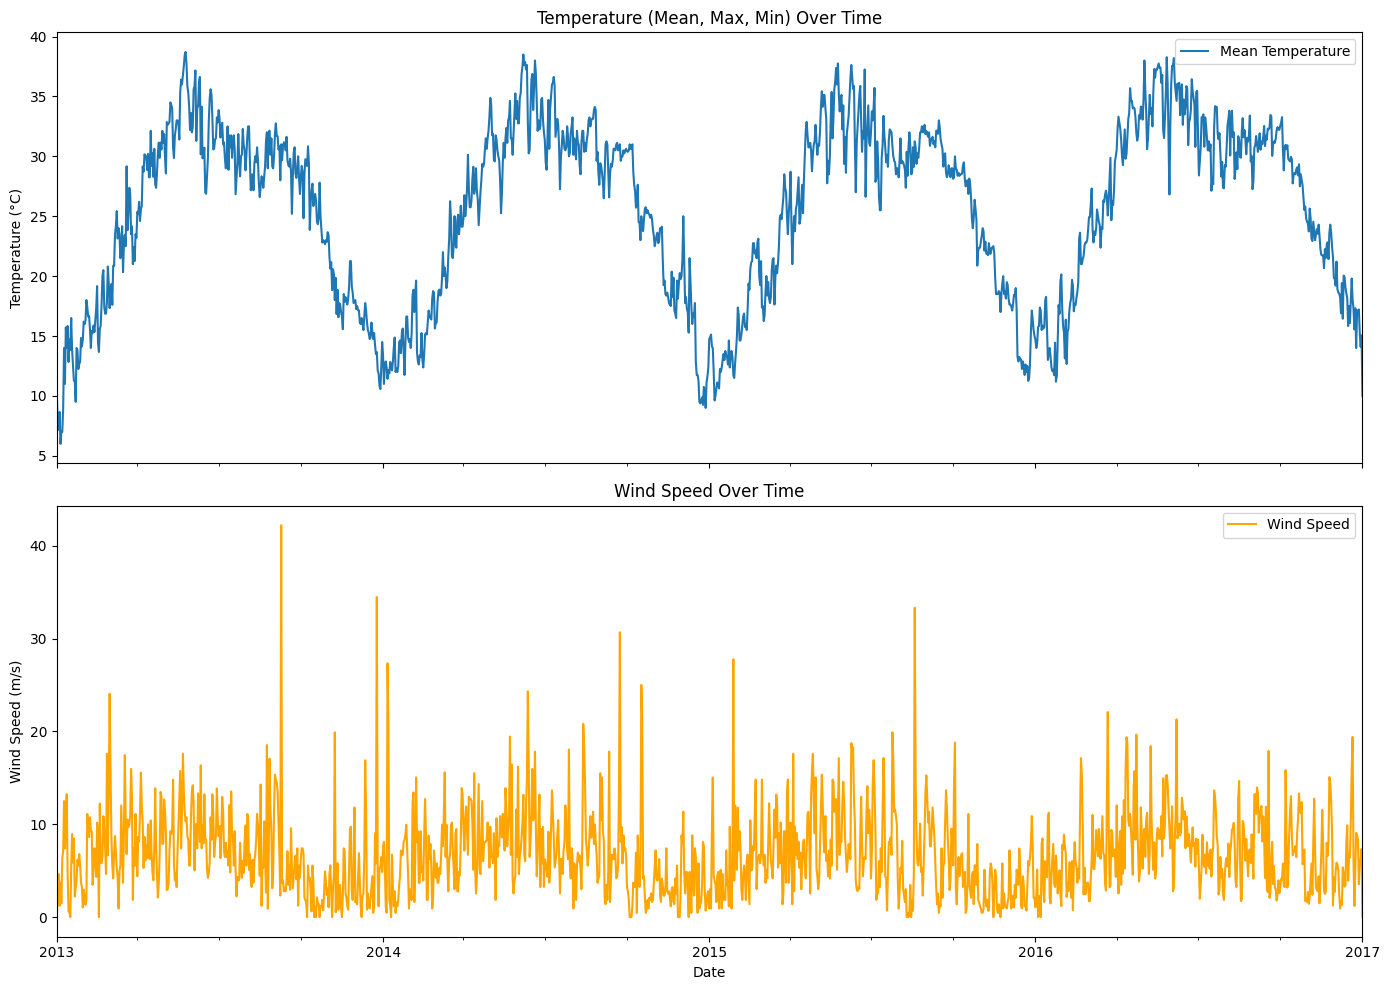

In [14]:
# Create subplots to visualize temperature and wind speed over time
fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Check the actual column names in your DataFrame
print(df.columns)

# Plot temperature (mean, max, min) over time
# Use the actual column names from your DataFrame
df[['meantemp']].plot(ax=ax[0])
ax[0].set_title("Temperature (Mean, Max, Min) Over Time")
ax[0].set_ylabel("Temperature (°C)")
ax[0].legend(["Mean Temperature", "Max Temperature", "Min Temperature"])

# Plot wind speed over time
df['wind_speed'].plot(ax=ax[1], color="orange")
ax[1].set_title("Wind Speed Over Time")
ax[1].set_ylabel("Wind Speed (m/s)")
ax[1].legend(["Wind Speed"])

# Set overall layout and show the plot
plt.xlabel("Date")
plt.tight_layout()
plt.show()

Q3

Seasonality and Trends:

Decompose the time series for daily mean temperature into its components (trend, seasonality, and residuals) using statistical decomposition methods.

In [15]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

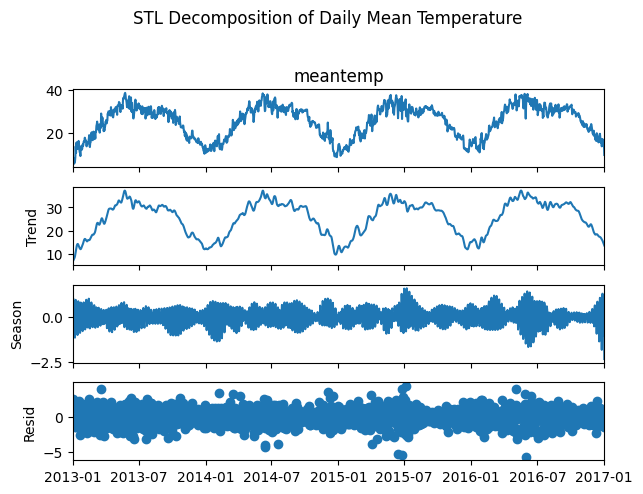

In [16]:

# Select the daily mean temperature for decomposition
daily_mean_temp = df['meantemp']

# Perform STL decomposition
stl = STL(daily_mean_temp, seasonal=13)  # Adjust seasonal period if needed
result = stl.fit()

# Plot the decomposition
result.plot()
plt.suptitle("STL Decomposition of Daily Mean Temperature", y=1.02)
plt.tight_layout()
plt.show()


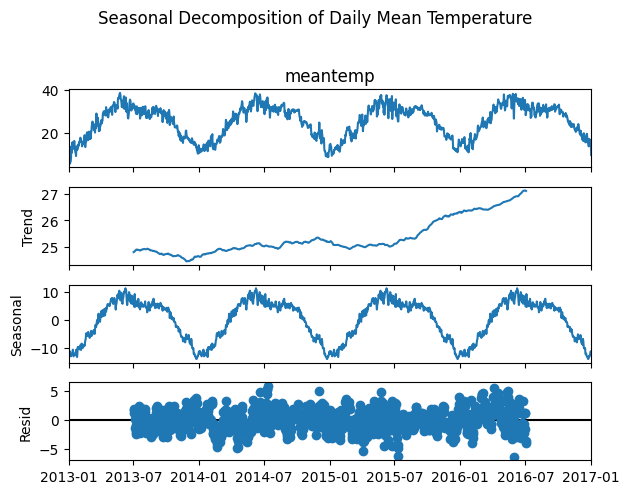

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# Select the daily mean temperature for decomposition
daily_mean_temp = df['meantemp']

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_mean_temp, model='additive', period=365)  # Adjust 'period' based on dataset

# Plot the decomposition
decomposition.plot()
plt.suptitle("Seasonal Decomposition of Daily Mean Temperature", y=1.02)
plt.tight_layout()
plt.show()


Identify any seasonal patterns and discuss their significance.

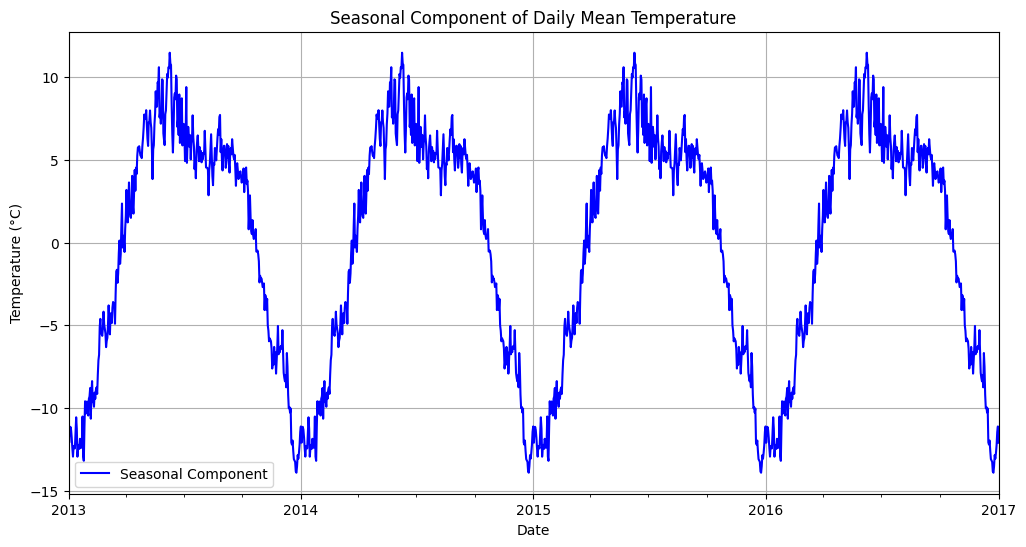

Seasonal Component Summary:
count    1462.000000
mean       -0.015875
std         7.116575
min       -13.909063
25%        -6.300945
50%         2.862091
75%         5.776824
max        11.478642
Name: seasonal, dtype: float64
Peak of Seasonal Component occurs on: 2013-06-09 00:00:00
Trough of Seasonal Component occurs on: 2013-12-25 00:00:00


In [18]:
daily_mean_temp = df['meantemp']

# Perform seasonal decomposition
decomposition = seasonal_decompose(daily_mean_temp, model='additive', period=365)  # Adjust 'period' as needed

# Extract seasonal component
seasonal = decomposition.seasonal

# Plot seasonal component
plt.figure(figsize=(12, 6))
seasonal.plot(color='blue', label='Seasonal Component')
plt.title('Seasonal Component of Daily Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# Analyze seasonal patterns
print("Seasonal Component Summary:")
print(seasonal.describe())

# Find seasonal peaks and troughs
seasonal_peaks = seasonal.idxmax()
seasonal_troughs = seasonal.idxmin()
print(f"Peak of Seasonal Component occurs on: {seasonal_peaks}")
print(f"Trough of Seasonal Component occurs on: {seasonal_troughs}")

Q4:

Select one variable (e.g., daily mean temperature) for forecasting.

Split the dataset into training and testing sets.

Fit Seasonal Decomposition of Time Series (STL) model to the training set.

Evaluate the forecasting performance using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

<ipython-input-19-4f2c957aeed2>:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_seasonal = train_seasonal[np.mod(np.arange(len(test)), len(train_seasonal))]
<ipython-input-19-4f2c957aeed2>:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_trend = np.full(len(test), train_trend[-1])


Mean Absolute Error (MAE): 6.866882744187854
Root Mean Squared Error (RMSE): 7.6536303925309195


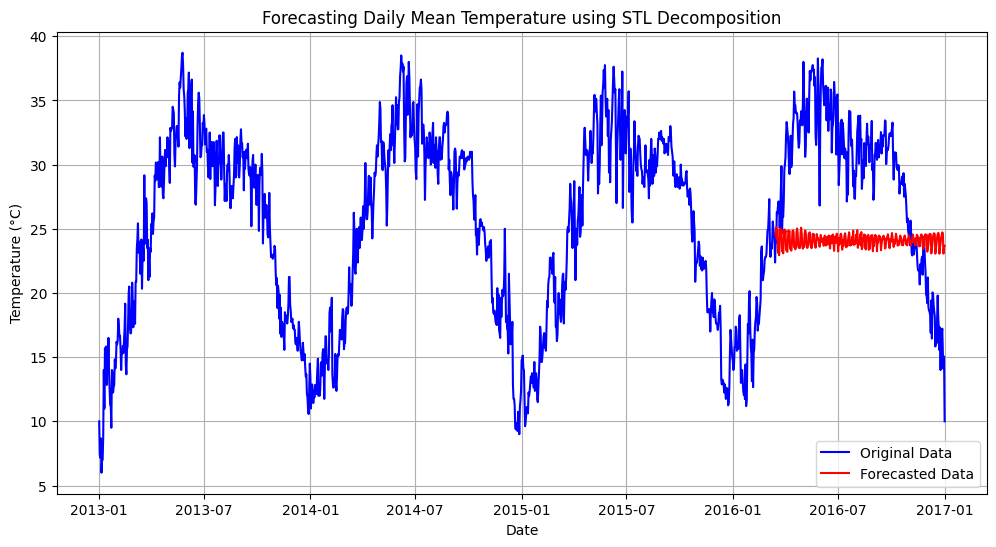

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Select the daily mean temperature for forecasting
daily_mean_temp = df['meantemp']

# Step 1: Split the dataset into training and testing sets
train_size = int(len(daily_mean_temp) * 0.8)  # Use 80% of the data for training
train, test = daily_mean_temp[:train_size], daily_mean_temp[train_size:]

# Step 2: Fit Seasonal Decomposition of Time Series (STL) model on the training set
stl = STL(train, seasonal=13)  # Adjust seasonal period based on dataset (365 for daily data over a year)
result_train = stl.fit()

# Extract the trend and seasonal components from the training data
train_trend = result_train.trend
train_seasonal = result_train.seasonal

# Step 3: Forecast the future values (by reconstructing the series with trend + seasonal components)
# In this case, we'll forecast using the trend and seasonal components for simplicity
# Align the seasonal component with the forecast period using modulo operator
forecast_seasonal = train_seasonal[np.mod(np.arange(len(test)), len(train_seasonal))]
# Extend the trend component using the last value of the trend
forecast_trend = np.full(len(test), train_trend[-1])
# Add the components to get the forecast
forecast = forecast_trend + forecast_seasonal # Repeating seasonal pattern for forecast period

# Step 4: Evaluate forecasting performance using MAE and RMSE
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mean_squared_error(test, forecast))

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_mean_temp.index, daily_mean_temp, label='Original Data', color='blue')
plt.plot(test.index, forecast, label='Forecasted Data', color='red')
plt.legend()
plt.title('Forecasting Daily Mean Temperature using STL Decomposition')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()
